In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [120]:
df = pd.read_csv("C:/Users/Dax/Downloads/diabetes.csv")

In [121]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [122]:
df.shape

(768, 9)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [124]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [125]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

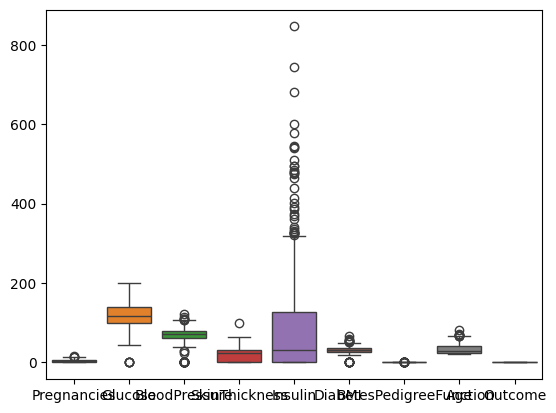

In [126]:
sns.boxplot(df)

In [127]:
cols_to_impute = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"] 
for col in cols_to_impute:
    median_val = df[col].median()
    df[col] = df[col].replace(0, median_val)

<Axes: xlabel='Glucose', ylabel='Count'>

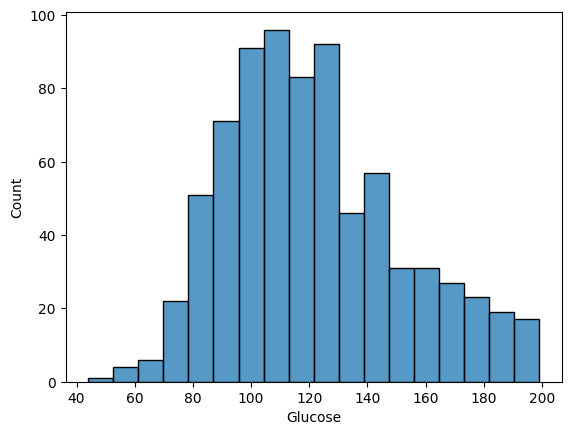

In [128]:
sns.histplot(df['Glucose'])

In [129]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

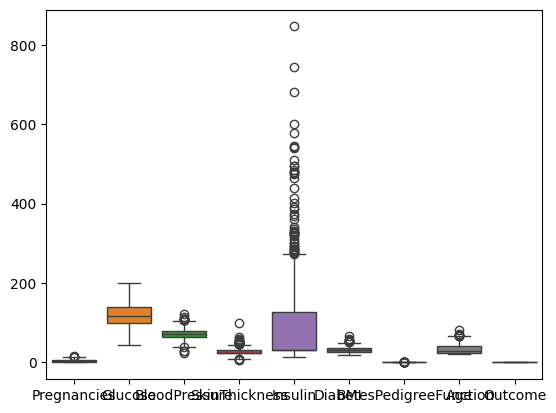

In [130]:
sns.boxplot(df)

<Axes: xlabel='Insulin', ylabel='Count'>

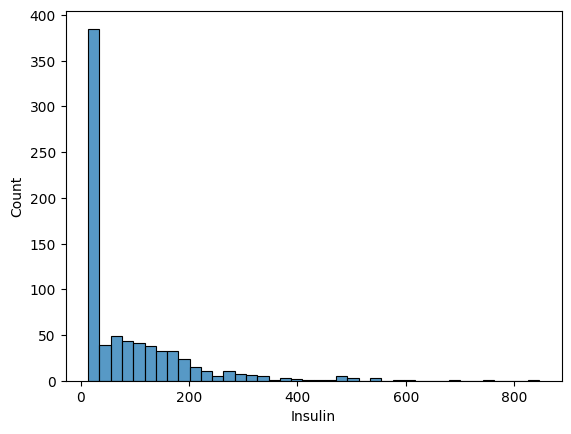

In [131]:
sns.histplot(df['Insulin'])

In [132]:
y = df['Outcome']

In [133]:
x = df.drop('Outcome',axis = 1)

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20 , random_state = 42)

In [136]:
sc = StandardScaler()

In [149]:
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

In [161]:
from sklearn.linear_model import LogisticRegression

In [163]:
lr = LogisticRegression()

In [165]:
lr.fit(x_train_sc,y_train)

LogisticRegression()

In [167]:
y_pred = lr.predict(x_test_sc)

In [175]:
y_pred_train = lr.predict(x_train_sc)

In [169]:
from sklearn.metrics import accuracy_score,r2_score

In [171]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7662337662337663


In [173]:
print("R2 Score:", accuracy_score(y_test, y_pred))

R2 Score: 0.7662337662337663


In [177]:
print("Accuracy:", accuracy_score(y_train, y_pred_train))

Accuracy: 0.7687296416938111


In [179]:
print("R2 Score:", accuracy_score(y_train, y_pred_train))

R2 Score: 0.7687296416938111
